<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/Beds_Occupancy_LSTM_TS_exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
keras = tf.keras

In [3]:
df = pd.read_csv('/content/beds_occupied.csv')
df

,date,occupied
0,11/05/2022 0:00,0.79
1,11/05/2022 1:00,0.79
2,11/05/2022 2:00,0.80
3,11/05/2022 3:00,0.80
4,11/05/2022 4:00,0.80
...,...,...
1995,02/08/2022 3:00,0.81
1996,02/08/2022 4:00,0.82
1997,02/08/2022 5:00,0.82
1998,02/08/2022 6:00,0.82


In [4]:
df.index = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df[:26]

,date,occupied
date,,
2022-05-11 00:00:00,11/05/2022 0:00,0.79
2022-05-11 01:00:00,11/05/2022 1:00,0.79
2022-05-11 02:00:00,11/05/2022 2:00,0.80
2022-05-11 03:00:00,11/05/2022 3:00,0.80
2022-05-11 04:00:00,11/05/2022 4:00,0.80
2022-05-11 05:00:00,11/05/2022 5:00,0.80
2022-05-11 06:00:00,11/05/2022 6:00,0.81
2022-05-11 07:00:00,11/05/2022 7:00,0.81
2022-05-11 08:00:00,11/05/2022 8:00,0.81


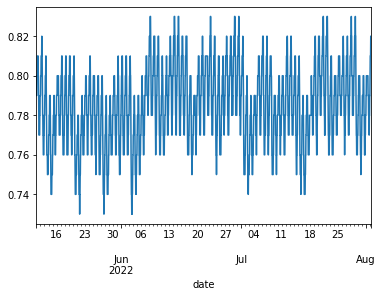

In [5]:
bed = df['occupied']
bed.plot()

In [6]:
def df_to_X_y(df, window_size=30):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [7]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(bed, WINDOW_SIZE)
X1.shape, y1.shape

((1995, 5, 1), (1995,))

In [8]:
X_train1, y_train1 = X1[:1500], y1[:1500]
X_val1, y_val1 = X1[1500:1750], y1[1500:1750]
X_test1, y_test1 = X1[1750:], y1[1750:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((1500, 5, 1), (1500,), (250, 5, 1), (250,), (245, 5, 1), (245,))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [22]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [23]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
41/47 [=========================>....] - ETA: 0s - loss: 3.5505e-04 - root_mean_squared_error: 0.0188

47/47 [==============================] - 8s 122ms/step - loss: 3.3353e-04 - root_mean_squared_error: 0.0183 - val_loss: 1.8343e-04 - val_root_mean_squared_error: 0.0135
Epoch 2/100
47/47 [==============================] - 0s 8ms/step - loss: 1.7461e-04 - root_mean_squared_error: 0.0132 - val_loss: 1.8969e-04 - val_root_mean_squared_error: 0.0138
Epoch 3/100
41/47 [=========================>....] - ETA: 0s - loss: 1.7428e-04 - root_mean_squared_error: 0.0132

47/47 [==============================] - 6s 121ms/step - loss: 1.7439e-04 - root_mean_squared_error: 0.0132 - val_loss: 1.7780e-04 - val_root_mean_squared_error: 0.0133
Epoch 4/100
47/47 [==============================] - 0s 8ms/step - loss: 1.7927e-04 - root_mean_squared_error: 0.0134 - val_loss: 1.9673e-04 - val_root_mean_squared_error: 0.0140
Epoch 5/100
47/47 [==============================] - 0s 8ms/step - loss: 1.6827e-04 - root_mean_squared_error: 0.0130 - val_loss: 2.0082e-04 - val_root_mean_squared_error: 0.0142
Epoch 6/100
47/47 [==============================] - 0s 8ms/step - loss: 1.8790e-04 - root_mean_squared_error: 0.0137 - val_loss: 3.0857e-04 - val_root_mean_squared_error: 0.0176
Epoch 7/100
47/47 [==============================] - 0s 8ms/step - loss: 2.3017e-04 - root_mean_squared_error: 0.0152 - val_loss: 1.8355e-04 - val_root_mean_squared_error: 0.0135
Epoch 8/100
47/47 [==============================] - 0s 8ms/step - loss: 1.7649e-04 - root_mean_squared_error: 0.01

47/47 [==============================] - 5s 118ms/step - loss: 2.0577e-04 - root_mean_squared_error: 0.0143 - val_loss: 1.7574e-04 - val_root_mean_squared_error: 0.0133
Epoch 12/100
40/47 [========================>.....] - ETA: 0s - loss: 1.7834e-04 - root_mean_squared_error: 0.0134

47/47 [==============================] - 5s 109ms/step - loss: 1.7655e-04 - root_mean_squared_error: 0.0133 - val_loss: 1.6932e-04 - val_root_mean_squared_error: 0.0130
Epoch 13/100
47/47 [==============================] - 0s 8ms/step - loss: 1.7382e-04 - root_mean_squared_error: 0.0132 - val_loss: 1.9543e-04 - val_root_mean_squared_error: 0.0140
Epoch 14/100
47/47 [==============================] - 0s 8ms/step - loss: 1.9592e-04 - root_mean_squared_error: 0.0140 - val_loss: 1.9867e-04 - val_root_mean_squared_error: 0.0141
Epoch 15/100
41/47 [=========================>....] - ETA: 0s - loss: 1.8764e-04 - root_mean_squared_error: 0.0137

47/47 [==============================] - 6s 125ms/step - loss: 1.8960e-04 - root_mean_squared_error: 0.0138 - val_loss: 1.6605e-04 - val_root_mean_squared_error: 0.0129
Epoch 16/100
47/47 [==============================] - ETA: 0s - loss: 1.6969e-04 - root_mean_squared_error: 0.0130

47/47 [==============================] - 5s 113ms/step - loss: 1.6969e-04 - root_mean_squared_error: 0.0130 - val_loss: 1.6495e-04 - val_root_mean_squared_error: 0.0128
Epoch 17/100
47/47 [==============================] - ETA: 0s - loss: 1.7616e-04 - root_mean_squared_error: 0.0133

47/47 [==============================] - 6s 123ms/step - loss: 1.7616e-04 - root_mean_squared_error: 0.0133 - val_loss: 1.6392e-04 - val_root_mean_squared_error: 0.0128
Epoch 18/100
40/47 [========================>.....] - ETA: 0s - loss: 1.7757e-04 - root_mean_squared_error: 0.0133

47/47 [==============================] - 5s 111ms/step - loss: 1.7280e-04 - root_mean_squared_error: 0.0131 - val_loss: 1.6248e-04 - val_root_mean_squared_error: 0.0127
Epoch 19/100
43/47 [==========================>...] - ETA: 0s - loss: 1.7522e-04 - root_mean_squared_error: 0.0132

47/47 [==============================] - 6s 125ms/step - loss: 1.7417e-04 - root_mean_squared_error: 0.0132 - val_loss: 1.6171e-04 - val_root_mean_squared_error: 0.0127
Epoch 20/100
47/47 [==============================] - 0s 7ms/step - loss: 1.7701e-04 - root_mean_squared_error: 0.0133 - val_loss: 1.6861e-04 - val_root_mean_squared_error: 0.0130
Epoch 21/100
47/47 [==============================] - 0s 8ms/step - loss: 1.9090e-04 - root_mean_squared_error: 0.0138 - val_loss: 1.7096e-04 - val_root_mean_squared_error: 0.0131
Epoch 22/100
47/47 [==============================] - 0s 8ms/step - loss: 1.6998e-04 - root_mean_squared_error: 0.0130 - val_loss: 1.6733e-04 - val_root_mean_squared_error: 0.0129
Epoch 23/100
41/47 [=========================>....] - ETA: 0s - loss: 1.6355e-04 - root_mean_squared_error: 0.0128

47/47 [==============================] - 5s 111ms/step - loss: 1.6503e-04 - root_mean_squared_error: 0.0128 - val_loss: 1.5833e-04 - val_root_mean_squared_error: 0.0126
Epoch 24/100
47/47 [==============================] - 0s 8ms/step - loss: 1.6038e-04 - root_mean_squared_error: 0.0127 - val_loss: 1.6277e-04 - val_root_mean_squared_error: 0.0128
Epoch 25/100
47/47 [==============================] - 0s 9ms/step - loss: 1.6342e-04 - root_mean_squared_error: 0.0128 - val_loss: 1.6183e-04 - val_root_mean_squared_error: 0.0127
Epoch 26/100
42/47 [=========================>....] - ETA: 0s - loss: 1.5982e-04 - root_mean_squared_error: 0.0126

47/47 [==============================] - 6s 123ms/step - loss: 1.5684e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.5687e-04 - val_root_mean_squared_error: 0.0125
Epoch 27/100
47/47 [==============================] - 0s 8ms/step - loss: 1.6831e-04 - root_mean_squared_error: 0.0130 - val_loss: 1.6046e-04 - val_root_mean_squared_error: 0.0127
Epoch 28/100
47/47 [==============================] - 0s 8ms/step - loss: 1.7305e-04 - root_mean_squared_error: 0.0132 - val_loss: 2.0417e-04 - val_root_mean_squared_error: 0.0143
Epoch 29/100
46/47 [============================>.] - ETA: 0s - loss: 1.5349e-04 - root_mean_squared_error: 0.0124

47/47 [==============================] - 5s 115ms/step - loss: 1.5300e-04 - root_mean_squared_error: 0.0124 - val_loss: 1.5614e-04 - val_root_mean_squared_error: 0.0125
Epoch 30/100
47/47 [==============================] - 0s 7ms/step - loss: 1.7208e-04 - root_mean_squared_error: 0.0131 - val_loss: 2.0386e-04 - val_root_mean_squared_error: 0.0143
Epoch 31/100
40/47 [========================>.....] - ETA: 0s - loss: 1.5440e-04 - root_mean_squared_error: 0.0124

47/47 [==============================] - 6s 125ms/step - loss: 1.5142e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.5001e-04 - val_root_mean_squared_error: 0.0122
Epoch 32/100
47/47 [==============================] - 0s 8ms/step - loss: 1.4985e-04 - root_mean_squared_error: 0.0122 - val_loss: 1.8018e-04 - val_root_mean_squared_error: 0.0134
Epoch 33/100
47/47 [==============================] - ETA: 0s - loss: 1.7761e-04 - root_mean_squared_error: 0.0133

47/47 [==============================] - 5s 111ms/step - loss: 1.7761e-04 - root_mean_squared_error: 0.0133 - val_loss: 1.4657e-04 - val_root_mean_squared_error: 0.0121
Epoch 34/100
47/47 [==============================] - 0s 8ms/step - loss: 1.5309e-04 - root_mean_squared_error: 0.0124 - val_loss: 2.9652e-04 - val_root_mean_squared_error: 0.0172
Epoch 35/100
47/47 [==============================] - 0s 8ms/step - loss: 1.5707e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.5368e-04 - val_root_mean_squared_error: 0.0124
Epoch 36/100
47/47 [==============================] - 0s 8ms/step - loss: 1.5144e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.5282e-04 - val_root_mean_squared_error: 0.0124
Epoch 37/100
42/47 [=========================>....] - ETA: 0s - loss: 1.5476e-04 - root_mean_squared_error: 0.0124

47/47 [==============================] - 6s 136ms/step - loss: 1.5153e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.4031e-04 - val_root_mean_squared_error: 0.0118
Epoch 38/100
47/47 [==============================] - 0s 8ms/step - loss: 1.5629e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.4116e-04 - val_root_mean_squared_error: 0.0119
Epoch 39/100
47/47 [==============================] - 0s 7ms/step - loss: 1.3806e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.5382e-04 - val_root_mean_squared_error: 0.0124
Epoch 40/100
47/47 [==============================] - 0s 9ms/step - loss: 1.5981e-04 - root_mean_squared_error: 0.0126 - val_loss: 1.4036e-04 - val_root_mean_squared_error: 0.0118
Epoch 41/100
47/47 [==============================] - 0s 8ms/step - loss: 1.3628e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.5896e-04 - val_root_mean_squared_error: 0.0126
Epoch 42/100
40/47 [========================>.....] - ETA: 0s - loss: 1.8090e-04 - root_mean_squared_error: 0.0

47/47 [==============================] - 5s 110ms/step - loss: 1.7266e-04 - root_mean_squared_error: 0.0131 - val_loss: 1.3480e-04 - val_root_mean_squared_error: 0.0116
Epoch 43/100
47/47 [==============================] - 0s 8ms/step - loss: 1.3052e-04 - root_mean_squared_error: 0.0114 - val_loss: 1.4002e-04 - val_root_mean_squared_error: 0.0118
Epoch 44/100
47/47 [==============================] - 0s 8ms/step - loss: 1.4937e-04 - root_mean_squared_error: 0.0122 - val_loss: 1.5395e-04 - val_root_mean_squared_error: 0.0124
Epoch 45/100
47/47 [==============================] - 0s 8ms/step - loss: 1.5121e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.4035e-04 - val_root_mean_squared_error: 0.0118
Epoch 46/100
47/47 [==============================] - 0s 9ms/step - loss: 1.6878e-04 - root_mean_squared_error: 0.0130 - val_loss: 1.3607e-04 - val_root_mean_squared_error: 0.0117
Epoch 47/100
47/47 [==============================] - 0s 7ms/step - loss: 1.2833e-04 - root_mean_squared_error:

47/47 [==============================] - 6s 121ms/step - loss: 1.2711e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.2806e-04 - val_root_mean_squared_error: 0.0113
Epoch 49/100
47/47 [==============================] - 0s 8ms/step - loss: 1.4385e-04 - root_mean_squared_error: 0.0120 - val_loss: 2.5085e-04 - val_root_mean_squared_error: 0.0158
Epoch 50/100
42/47 [=========================>....] - ETA: 0s - loss: 1.3944e-04 - root_mean_squared_error: 0.0118

47/47 [==============================] - 5s 106ms/step - loss: 1.3624e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.2687e-04 - val_root_mean_squared_error: 0.0113
Epoch 51/100
45/47 [===========================>..] - ETA: 0s - loss: 1.2522e-04 - root_mean_squared_error: 0.0112

47/47 [==============================] - 5s 118ms/step - loss: 1.2594e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.2291e-04 - val_root_mean_squared_error: 0.0111
Epoch 52/100
47/47 [==============================] - 0s 7ms/step - loss: 1.2099e-04 - root_mean_squared_error: 0.0110 - val_loss: 1.4259e-04 - val_root_mean_squared_error: 0.0119
Epoch 53/100
47/47 [==============================] - 0s 8ms/step - loss: 1.4152e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.6213e-04 - val_root_mean_squared_error: 0.0127
Epoch 54/100
47/47 [==============================] - 0s 8ms/step - loss: 1.4063e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.4209e-04 - val_root_mean_squared_error: 0.0119
Epoch 55/100
47/47 [==============================] - 0s 8ms/step - loss: 1.3462e-04 - root_mean_squared_error: 0.0116 - val_loss: 1.2395e-04 - val_root_mean_squared_error: 0.0111
Epoch 56/100
47/47 [==============================] - 0s 8ms/step - loss: 1.5808e-04 - root_mean_squared_error:

47/47 [==============================] - 5s 107ms/step - loss: 1.2491e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.1835e-04 - val_root_mean_squared_error: 0.0109
Epoch 58/100
44/47 [===========================>..] - ETA: 0s - loss: 1.1998e-04 - root_mean_squared_error: 0.0110

47/47 [==============================] - 6s 122ms/step - loss: 1.2136e-04 - root_mean_squared_error: 0.0110 - val_loss: 1.1216e-04 - val_root_mean_squared_error: 0.0106
Epoch 59/100
47/47 [==============================] - 0s 8ms/step - loss: 1.5483e-04 - root_mean_squared_error: 0.0124 - val_loss: 1.7217e-04 - val_root_mean_squared_error: 0.0131
Epoch 60/100
47/47 [==============================] - 0s 9ms/step - loss: 1.3246e-04 - root_mean_squared_error: 0.0115 - val_loss: 1.3332e-04 - val_root_mean_squared_error: 0.0115
Epoch 61/100
47/47 [==============================] - 0s 7ms/step - loss: 1.3974e-04 - root_mean_squared_error: 0.0118 - val_loss: 1.2226e-04 - val_root_mean_squared_error: 0.0111
Epoch 62/100
47/47 [==============================] - 0s 8ms/step - loss: 1.1737e-04 - root_mean_squared_error: 0.0108 - val_loss: 1.9874e-04 - val_root_mean_squared_error: 0.0141
Epoch 63/100
42/47 [=========================>....] - ETA: 0s - loss: 1.1465e-04 - root_mean_squared_error: 0.0

47/47 [==============================] - 5s 110ms/step - loss: 1.1329e-04 - root_mean_squared_error: 0.0106 - val_loss: 1.0719e-04 - val_root_mean_squared_error: 0.0104
Epoch 64/100
47/47 [==============================] - 0s 8ms/step - loss: 1.2398e-04 - root_mean_squared_error: 0.0111 - val_loss: 1.1529e-04 - val_root_mean_squared_error: 0.0107
Epoch 65/100
43/47 [==========================>...] - ETA: 0s - loss: 1.0147e-04 - root_mean_squared_error: 0.0101

47/47 [==============================] - 6s 120ms/step - loss: 1.0274e-04 - root_mean_squared_error: 0.0101 - val_loss: 1.0223e-04 - val_root_mean_squared_error: 0.0101
Epoch 66/100
47/47 [==============================] - 0s 8ms/step - loss: 1.0073e-04 - root_mean_squared_error: 0.0100 - val_loss: 1.0739e-04 - val_root_mean_squared_error: 0.0104
Epoch 67/100
47/47 [==============================] - 0s 7ms/step - loss: 1.0472e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.0863e-04 - val_root_mean_squared_error: 0.0104
Epoch 68/100
47/47 [==============================] - ETA: 0s - loss: 1.0514e-04 - root_mean_squared_error: 0.0103

47/47 [==============================] - 5s 110ms/step - loss: 1.0514e-04 - root_mean_squared_error: 0.0103 - val_loss: 9.8631e-05 - val_root_mean_squared_error: 0.0099
Epoch 69/100
41/47 [=========================>....] - ETA: 0s - loss: 9.1511e-05 - root_mean_squared_error: 0.0096

47/47 [==============================] - 6s 123ms/step - loss: 9.2770e-05 - root_mean_squared_error: 0.0096 - val_loss: 9.6726e-05 - val_root_mean_squared_error: 0.0098
Epoch 70/100
47/47 [==============================] - 0s 8ms/step - loss: 1.0303e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.0945e-04 - val_root_mean_squared_error: 0.0105
Epoch 71/100
41/47 [=========================>....] - ETA: 0s - loss: 1.1474e-04 - root_mean_squared_error: 0.0107

47/47 [==============================] - 5s 109ms/step - loss: 1.1271e-04 - root_mean_squared_error: 0.0106 - val_loss: 9.5143e-05 - val_root_mean_squared_error: 0.0098
Epoch 72/100
46/47 [============================>.] - ETA: 0s - loss: 9.7939e-05 - root_mean_squared_error: 0.0099

47/47 [==============================] - 6s 125ms/step - loss: 9.8571e-05 - root_mean_squared_error: 0.0099 - val_loss: 8.9586e-05 - val_root_mean_squared_error: 0.0095
Epoch 73/100
47/47 [==============================] - 0s 7ms/step - loss: 9.2804e-05 - root_mean_squared_error: 0.0096 - val_loss: 9.5186e-05 - val_root_mean_squared_error: 0.0098
Epoch 74/100
47/47 [==============================] - 0s 7ms/step - loss: 8.8097e-05 - root_mean_squared_error: 0.0094 - val_loss: 1.0368e-04 - val_root_mean_squared_error: 0.0102
Epoch 75/100
47/47 [==============================] - 0s 8ms/step - loss: 1.0328e-04 - root_mean_squared_error: 0.0102 - val_loss: 9.6625e-05 - val_root_mean_squared_error: 0.0098
Epoch 76/100
47/47 [==============================] - 0s 7ms/step - loss: 1.0791e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.0762e-04 - val_root_mean_squared_error: 0.0104
Epoch 77/100
39/47 [=======================>......] - ETA: 0s - loss: 8.8004e-05 - root_mean_squared_error: 0.0

47/47 [==============================] - 5s 112ms/step - loss: 8.7914e-05 - root_mean_squared_error: 0.0094 - val_loss: 8.1553e-05 - val_root_mean_squared_error: 0.0090
Epoch 78/100
47/47 [==============================] - 0s 8ms/step - loss: 1.0226e-04 - root_mean_squared_error: 0.0101 - val_loss: 1.3241e-04 - val_root_mean_squared_error: 0.0115
Epoch 79/100
46/47 [============================>.] - ETA: 0s - loss: 9.6086e-05 - root_mean_squared_error: 0.0098

47/47 [==============================] - 6s 126ms/step - loss: 9.5855e-05 - root_mean_squared_error: 0.0098 - val_loss: 7.8438e-05 - val_root_mean_squared_error: 0.0089
Epoch 80/100
47/47 [==============================] - 0s 8ms/step - loss: 7.4429e-05 - root_mean_squared_error: 0.0086 - val_loss: 8.6987e-05 - val_root_mean_squared_error: 0.0093
Epoch 81/100
47/47 [==============================] - 0s 7ms/step - loss: 8.3774e-05 - root_mean_squared_error: 0.0092 - val_loss: 8.2132e-05 - val_root_mean_squared_error: 0.0091
Epoch 82/100
47/47 [==============================] - 0s 8ms/step - loss: 8.2799e-05 - root_mean_squared_error: 0.0091 - val_loss: 8.0011e-05 - val_root_mean_squared_error: 0.0089
Epoch 83/100
43/47 [==========================>...] - ETA: 0s - loss: 8.4644e-05 - root_mean_squared_error: 0.0092

47/47 [==============================] - 5s 111ms/step - loss: 8.5936e-05 - root_mean_squared_error: 0.0093 - val_loss: 7.5662e-05 - val_root_mean_squared_error: 0.0087
Epoch 84/100
47/47 [==============================] - 0s 9ms/step - loss: 1.4049e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.3042e-04 - val_root_mean_squared_error: 0.0114
Epoch 85/100
41/47 [=========================>....] - ETA: 0s - loss: 7.4353e-05 - root_mean_squared_error: 0.0086

47/47 [==============================] - 6s 122ms/step - loss: 7.7368e-05 - root_mean_squared_error: 0.0088 - val_loss: 7.1080e-05 - val_root_mean_squared_error: 0.0084
Epoch 86/100
43/47 [==========================>...] - ETA: 0s - loss: 9.0102e-05 - root_mean_squared_error: 0.0095

47/47 [==============================] - 5s 111ms/step - loss: 9.0422e-05 - root_mean_squared_error: 0.0095 - val_loss: 7.0786e-05 - val_root_mean_squared_error: 0.0084
Epoch 87/100
47/47 [==============================] - 0s 9ms/step - loss: 9.3117e-05 - root_mean_squared_error: 0.0096 - val_loss: 1.0043e-04 - val_root_mean_squared_error: 0.0100
Epoch 88/100
47/47 [==============================] - 0s 8ms/step - loss: 7.7232e-05 - root_mean_squared_error: 0.0088 - val_loss: 7.5119e-05 - val_root_mean_squared_error: 0.0087
Epoch 89/100
44/47 [===========================>..] - ETA: 0s - loss: 6.8445e-05 - root_mean_squared_error: 0.0083

47/47 [==============================] - 6s 123ms/step - loss: 6.9570e-05 - root_mean_squared_error: 0.0083 - val_loss: 7.0173e-05 - val_root_mean_squared_error: 0.0084
Epoch 90/100
47/47 [==============================] - 0s 7ms/step - loss: 8.2376e-05 - root_mean_squared_error: 0.0091 - val_loss: 7.4318e-05 - val_root_mean_squared_error: 0.0086
Epoch 91/100
47/47 [==============================] - 0s 7ms/step - loss: 8.4543e-05 - root_mean_squared_error: 0.0092 - val_loss: 8.8442e-05 - val_root_mean_squared_error: 0.0094
Epoch 92/100
47/47 [==============================] - 0s 8ms/step - loss: 8.1280e-05 - root_mean_squared_error: 0.0090 - val_loss: 7.1104e-05 - val_root_mean_squared_error: 0.0084
Epoch 93/100
47/47 [==============================] - 0s 8ms/step - loss: 7.3096e-05 - root_mean_squared_error: 0.0085 - val_loss: 8.3948e-05 - val_root_mean_squared_error: 0.0092
Epoch 94/100
47/47 [==============================] - 0s 9ms/step - loss: 6.2168e-05 - root_mean_squared_error:

47/47 [==============================] - 5s 114ms/step - loss: 6.3860e-05 - root_mean_squared_error: 0.0080 - val_loss: 6.7449e-05 - val_root_mean_squared_error: 0.0082
Epoch 96/100
43/47 [==========================>...] - ETA: 0s - loss: 6.5746e-05 - root_mean_squared_error: 0.0081

47/47 [==============================] - 6s 135ms/step - loss: 6.5638e-05 - root_mean_squared_error: 0.0081 - val_loss: 5.8707e-05 - val_root_mean_squared_error: 0.0077
Epoch 97/100
47/47 [==============================] - 0s 8ms/step - loss: 7.4258e-05 - root_mean_squared_error: 0.0086 - val_loss: 1.2961e-04 - val_root_mean_squared_error: 0.0114
Epoch 98/100
47/47 [==============================] - 0s 8ms/step - loss: 6.4741e-05 - root_mean_squared_error: 0.0080 - val_loss: 6.7878e-05 - val_root_mean_squared_error: 0.0082
Epoch 99/100
47/47 [==============================] - 0s 8ms/step - loss: 5.8379e-05 - root_mean_squared_error: 0.0076 - val_loss: 7.6217e-05 - val_root_mean_squared_error: 0.0087
Epoch 100/100
47/47 [==============================] - 0s 9ms/step - loss: 6.8144e-05 - root_mean_squared_error: 0.0083 - val_loss: 6.7039e-05 - val_root_mean_squared_error: 0.0082


In [24]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [25]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,0.799798,0.80
1,0.799134,0.81
2,0.801989,0.81
3,0.805847,0.81
4,0.807294,0.81
...,...,...
1495,0.810283,0.80
1496,0.801249,0.79
1497,0.789928,0.78
1498,0.780978,0.78


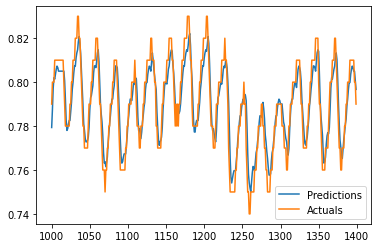

In [26]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1000:1400], label='Predictions')
plt.plot(train_results['Actuals'][1000:1400], label='Actuals')
plt.legend()

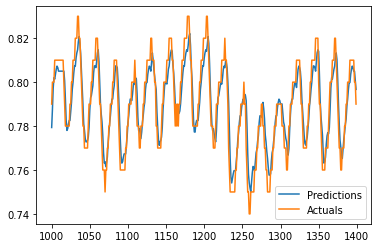

In [27]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1000:1400], label='Predictions')
plt.plot(train_results['Actuals'][1000:1400], label='Actuals')
plt.legend()

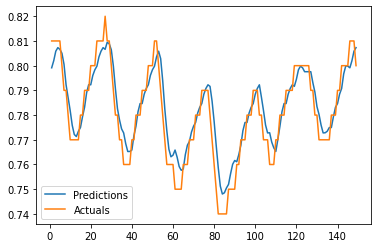

In [28]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1:150], label='Predictions')
plt.plot(train_results['Actuals'][1:150], label='Actuals')
plt.legend()

In [29]:
keras.metrics.mean_absolute_error(y_train1, train_predictions).numpy()

0.006013059

In [30]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,0.774415,0.77
1,0.772785,0.77
2,0.772841,0.77
3,0.773449,0.77
4,0.774958,0.78
...,...,...
245,0.771128,0.77
246,0.774034,0.77
247,0.777028,0.78
248,0.780835,0.79


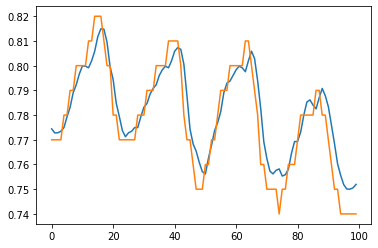

In [31]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [32]:
keras.metrics.mean_absolute_error(y_val1, val_predictions).numpy()

0.00628988

In [33]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,0.792901,0.79
1,0.793783,0.80
2,0.796036,0.80
3,0.798334,0.80
4,0.799798,0.81
...,...,...
240,0.808086,0.81
241,0.808875,0.82
242,0.811049,0.82
243,0.813311,0.82


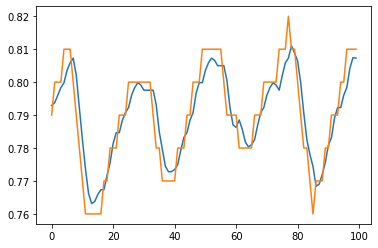

In [34]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [35]:
keras.metrics.mean_absolute_error(y_test1, test_predictions).numpy()

0.005367934